In [9]:
# environment set up
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import pandas as pd
from spectra_ml.io_ import load_spectra_metadata

In [10]:
# working folder
spectrum_len = 500

parent_dir = os.environ['PWD']
data_dir = os.environ['DATA_DIR']
stddata_path = os.path.join(data_dir, "StdData-" + str(spectrum_len))

In [11]:
metadata = load_spectra_metadata(os.path.join(stddata_path,"spectra-metadata.csv"))

metadata = metadata[metadata['value_type'] == "reflectance"]
metadata = metadata[~metadata['spectrometer_purity_code'].str.contains("NIC4")]
metadata = metadata[metadata['raw_data_path'].str.contains("ChapterM")]

In [12]:
os.chdir(os.path.join(parent_dir, "lab-notebook", "smunukutla"))
data = pd.read_csv("data.csv", sep=",", dtype=str)
record_nums = data.iloc[0, :].tolist()
spectrum_names = data.iloc[1, :].tolist()
y = data.iloc[2, :].astype(int).tolist()
y = np.reshape(y, (len(y), 1))
num_samples = len(y)

In [13]:
spectra = np.zeros((num_samples,spectrum_len))
wavelengths = np.zeros((1,spectrum_len))

In [14]:
for i in range(num_samples):
    data = pd.read_csv(os.path.join(stddata_path,"{}.csv".format(record_nums[i])))
    if i == 0:
        wavelengths[i,:] = data.iloc[:, 0].to_numpy()
    spectra[i,:] = data.iloc[:, 1].to_numpy()

In [15]:
num_samples

166

In [16]:
spectra

array([[0.36625177, 0.37408954, 0.38041823, ..., 0.69747148, 0.69613203,
        0.69590056],
       [0.22933248, 0.23542408, 0.24072858, ..., 0.57995432, 0.57845447,
        0.58057582],
       [0.10552621, 0.10864627, 0.11163579, ..., 0.3127732 , 0.31293405,
        0.31438494],
       ...,
       [0.84827669, 0.8483359 , 0.84993451, ..., 0.73254605, 0.72484708,
        0.71382553],
       [0.88008486, 0.88482508, 0.88539167, ..., 0.75476558, 0.74785095,
        0.7386977 ],
       [0.87846376, 0.87814294, 0.87539409, ..., 0.7541015 , 0.74652251,
        0.73594507]])

In [29]:
examples = 20
lst = []
for i in range(examples):
    lst.append(random.randint(0, num_samples-1))
print(lst)

[35, 49, 137, 127, 108, 40, 72, 33, 29, 64, 127, 11, 98, 86, 8, 74, 85, 55, 17, 61]


Original Spectra: 35


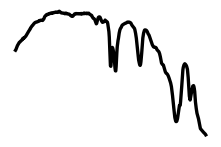

Original Spectra: 49


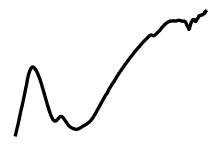

Original Spectra: 137


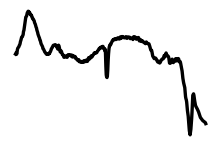

Original Spectra: 127


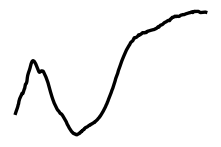

Original Spectra: 108


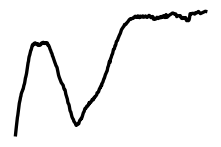

Original Spectra: 40


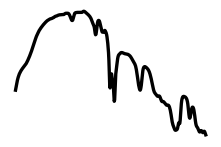

Original Spectra: 72


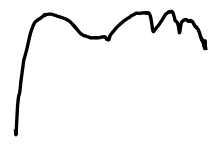

Original Spectra: 33


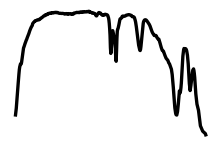

Original Spectra: 29


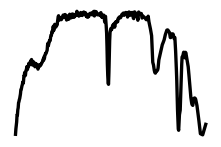

Original Spectra: 64


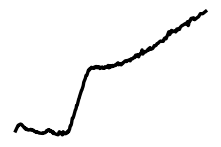

Original Spectra: 127


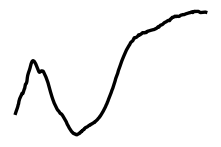

Original Spectra: 11


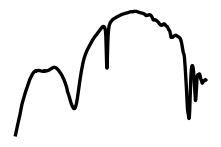

Original Spectra: 98


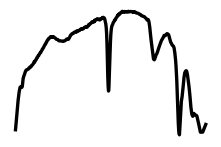

Original Spectra: 86


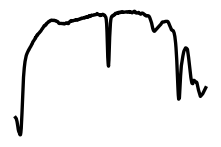

Original Spectra: 8


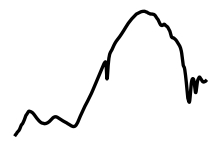

Original Spectra: 74


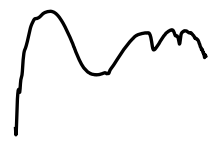

Original Spectra: 85


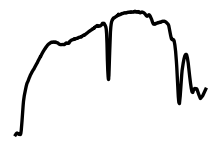

Original Spectra: 55


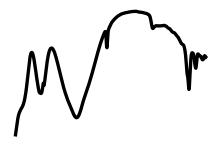

Original Spectra: 17


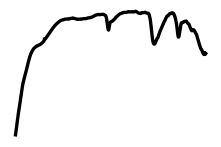

Original Spectra: 61


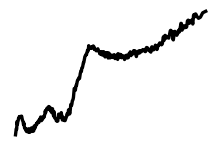

In [32]:
height = 3
width = 1.5*height
linewidth = 4
# figsize=(width, height), dpi=96 default
# for i in range(num_samples):
for index in lst:
    fig = plt.figure(figsize=(width, height), dpi=60)
    plt.plot(wavelengths[0,:], spectra[index,:], linewidth = linewidth, color='k')
    plt.xticks([])
    plt.yticks([])
    ax = fig.axes
    ax[0].axis('off')
    print("Original Spectra:", index)
    plt.show()
# path = os.path.join(data_dir, "plots-" + str(spectrum_len), record_nums[i] + "-" + spectrum_names[i] + ".png")
# fig.savefig(path, format = "PNG")
# plt.close(fig)